# 0. Imports & Google Drive mount

In [ ]:
!pip show Pillow

Name: pillow
Version: 11.0.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: 
Author-email: "Jeffrey A. Clark" <aclark@aclark.net>
License: MIT-CMU
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: bokeh, diffusers, dopamine_rl, fastai, imageio, imgaug, matplotlib, scikit-image, sentence-transformers, torchvision, wordcloud


In [ ]:
!pip install imageio

In [ ]:
!pip install qoi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 16.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for qoi: filename=qoi-0.7.0-cp310-cp310-linux_x86_64.whl size=434125 sha256=c9d2aaef4e70c5721a9896ee30a8b458fcfc9fe6e3dda7f4a8e2071f2c29922f
  Stored in directory: /root/.cache/pip/wheels/a5/8f/53/7106ae9c16a09204bada2e37be4765d4bc177d1619ac3467c9
Successfully built qoi


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from PIL import Image
from google.colab import files
import time
import os
import imageio.v2 as imageio
import qoi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Dataset(s)

In [ ]:
home_directory = '/content/drive/MyDrive/ICF'
downloads_path = home_directory + '/downloads'
datasets_path = home_directory + '/datasets'
kodak_path = datasets_path + '/kodak'

# Ensure the directories exist
!mkdir -p {downloads_path}
!mkdir -p {datasets_path}

In [ ]:
!pip install -q kaggle

The best way to download this dataset is through Kaggle.
First create a token, download it and upload it here. Follow these steps: https://www.kaggle.com/discussions/general/74235

In [ ]:
# Check if the kaggle.json file exists, and if not, upload and set up
if not os.path.exists(home_directory + '/.kaggle/kaggle.json'):
    !files.upload()
    !mkdir -p {home_directory}.kaggle
    !cp kaggle.json {home_directory}.kaggle/
    !chmod 600 {home_directory}.kaggle/kaggle.json
    print("kaggle.json has been uploaded and permissions set.")
else:
    print("kaggle.json already exists.")

kaggle.json already exists.


Kodak dataset from kaggle. https://www.kaggle.com/datasets/sherylmehta/kodak-dataset?select=kodim21.png

In [ ]:
if not os.path.exists(downloads_path + '/kodak-dataset.zip'):
    !kaggle datasets download -d sherylmehta/kodak-dataset -p {downloads_path}
    !unzip {downloads_path}/kodak-dataset.zip -d {datasets_path}/kodak
    print("Dataset downloaded and unzipped.")
else:
    print("Dataset already downloaded and unzipped.")

Dataset already downloaded and unzipped.


# 2. Data loading

In [ ]:
# Load images from the directory
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.endswith((".png", ".jpg", ".jpeg", ".bmp")):
            image_path = os.path.join(directory, filename)
            img = Image.open(image_path).convert("RGB")  # Ensure consistent format
            images.append(image_path)
            print(f"File found with name: {filename} path: {image_path}")
    return images

# Example usage
images = load_images(kodak_path)
print(f"There are {len(images)} images found in \'{kodak_path}\'.")

File found with name: kodim01.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim01.png
File found with name: kodim02.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim02.png
File found with name: kodim03.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim03.png
File found with name: kodim21.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim21.png
File found with name: kodim20.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim20.png
File found with name: kodim23.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim23.png
File found with name: kodim18.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim18.png
File found with name: kodim12.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim12.png
File found with name: kodim24.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim24.png
File found with name: kodim11.png path: /content/drive/MyDrive/ICF/datasets/kodak/kodim11.png
File found with name: kodim10.png path: /content/drive/MyDri

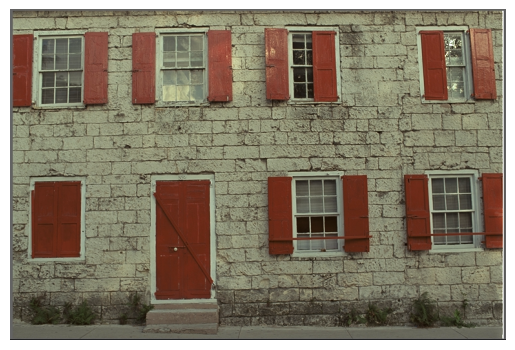

In [ ]:
test_image = imageio.imread(images[0])
plt.imshow(test_image)
plt.axis('off')  # Hide axes
plt.show()

#3 Image Compression Formats

---

### **Lossless Formats**

#### **Older Lossless Formats**
- **BMP (Bitmap)**: `.bmp`, `.dib`, `.dib`, `.dpx`, `.rgb`, `.rgba`, `.sunras`, `.ras`
- **GIF (Graphics Interchange Format)**: `.gif`
- **PNG (Portable Network Graphics)**: `.png`, `.pnm`
- **TIFF (Tagged Image File Format)**: `.tif`, `.tiff`, `.ptif`, `.ptiff`
- **JPEG 2000**: `.jp2`, `.j2c`, `.j2k`, `.jpc`, `.jpf`
- **Postscript (EPS)**: `.eps`
- **JPEG XR (JPEG Extended Range)**: `.jxr`, `.wdp`
- **FITS (Flexible Image Transport System)**: `.fits`, `.fit`, `.fts`, `.fth`
- **PCX**: `.pcx`
- **PAM (Portable Arbitrary Map)**: `.pam`
- **PBM (Portable Bitmap)**: `.pbm`
- **PPM (Portable Pixel Map)**: `.ppm`
- **XBM (X11 Bitmap)**: `.xbm`
- **XPM (X11 Pixel Map)**: `.xpm`
- **TARGA (Truevision TGA)**: `.tga`
- **WBMP (Wireless Bitmap)**: `.wbmp`, `.wap`, `.wbm`

#### **Newer Lossless Formats**
- **WebP**: `.webp`
- **HEIF (High Efficiency Image File Format)**: `.heic`
- **AVIF (AV1 Image File Format)**: `.avif`
- **OpenEXR**: `.exr`
- **JPEG 2000**: `.j2k`
- **HDR (High Dynamic Range Image)**: `.hdr`
- **JPEG XR (JPEG Extended Range)**: `.jxr`

---

### **Lossy Formats**

#### **Older Lossy Formats**
- **JPEG**: `.jpg`, `.jpeg`, `.jfif`, `.jpe`, `.jif`, `.jng`
- **MPEG-1**: `.mpeg`, `.mpg`
- **MPEG-2**: `.vob`, `.ts`
- **H.261**: `.h261`
- **H.263**: `.h263`
- **H.264**: `.h264`, `.avi`, `.mp4`, `.mov`, `.mkv`, `.flv`
- **MJPEG**: `.mjpeg`, `.mjpg`
- **RealMedia**: `.rm`
- **MobiClip**: `.mods`, `.moflex`
- **Windows Media Video**: `.wmv`

#### **Newer Lossy Formats**
- **AV1**: `.avif`, `.webm`
- **HEVC (High Efficiency Video Coding)**: `.hevc`, `.h265`, `.h.265`, `.h.264`
- **HEVC Video (H.265)**: `.hevc`
- **WebM**: `.webm`
- **FLV (Flash Video)**: `.flv`
- **MP4**: `.mp4`, `.m4a`, `.m4b`, `.m4v`

---

This categorization leaves out video and icon formats, focusing strictly on image formats and separating them by lossless or lossy compression with older and newer distinctions.

In [ ]:
import numpy as np
import imageio.v2 as imageio
import os

# Load an image (replace with your image path)
image_path = kodak_path + '/kodim01.png'
image = imageio.imread(image_path)

# Define a path for the temporary GIF file
gif_path = 'temp_image.gif'

# Save the image as a GIF
imageio.imwrite(gif_path, image)

# Read the GIF back
gif_image = imageio.imread(gif_path)

# Calculate the pixel-wise difference
difference = np.abs(image - gif_image)

# Sum the differences to get an overall measure
total_difference = np.sum(difference)

# Print the total difference
print(f"Total pixel-wise difference: {total_difference}")

# Clean up the temporary GIF file
os.remove(gif_path)

# Interpret result
if total_difference == 0:
    print("The GIF is lossless with respect to the original image.")
else:
    print("The GIF may have lost some information (likely due to compression).")


Total pixel-wise difference: 110568983
The GIF may have lost some information (likely due to compression).


In [ ]:
import numpy as np
import imageio

def check_gif_compression(image):
    # Count the number of unique colors in the image
    unique_colors = np.unique(image.reshape(-1, image.shape[2]), axis=0)

    if len(unique_colors) > 256:
        return "Lossy compression likely (more than 256 colors)"
    else:
        return "Lossless compression likely (256 or fewer colors)"

# Load image as numpy array (RGB)
image = imageio.imread(kodak_path + '/kodim01.png')

# Check if the image will be lossy or lossless when compressed to GIF
result = check_gif_compression(image)
print(result)


<ipython-input-13-fd603cb52f3d>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(kodak_path + '/kodim01.png')


Lossy compression likely (more than 256 colors)


## Choosen formats from above:
### Lossless:
#### Older:
- BMP (.bmp)
- GIF (.gif)
- PNG (.png)
- TIFF (.tiff)
#### Newer:
- WebP (.webp)
- HEIF (.heic)
- AVIF (.avif)
- QOI (.qoi)

### Lossy:
#### Older:
- JPEG (.jpg)
#### Newer:
- AVIF (.avif)

QOI: https://pypi.org/project/qoi/

Original image size: 587.97 KB
Encoded image size: 627.20 KB
Encoding time: 0.0250 seconds
Decoding time: 0.0114 seconds


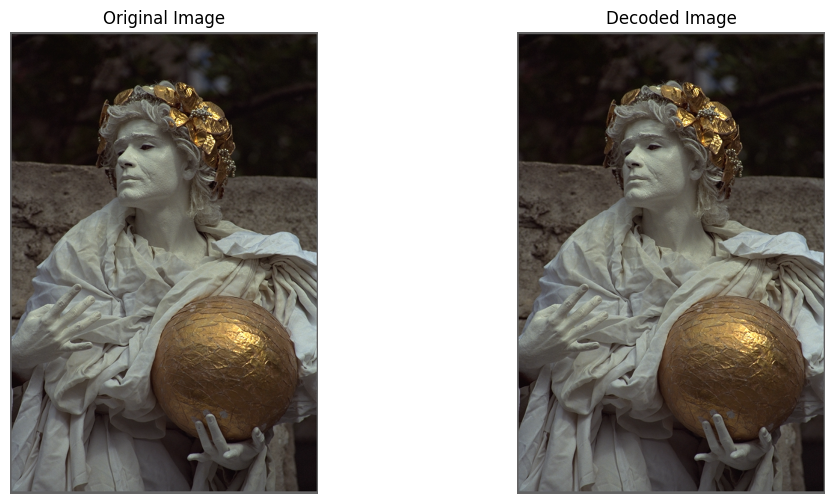

Read image matches the original image.


In [ ]:
import time
import os
from PIL import Image
import qoi
import numpy as np
import matplotlib.pyplot as plt

# Load an image for testing (you can upload any image to Colab)
img_path = kodak_path + '/kodim17.png'  # Replace with your image path if necessary
img = Image.open(img_path)

# Convert the image to a numpy array (HWC order)
img_array = np.array(img)

# Time the encoding process (QOI encoding to bytes)
start_encoding = time.time()
encoded_img_bytes = qoi.encode(img_array)
end_encoding = time.time()

# Time the decoding process (QOI decoding from bytes)
start_decoding = time.time()
decoded_img_bytes = qoi.decode(encoded_img_bytes)
end_decoding = time.time()

# Convert the decoded image back to a PIL image for comparison
decoded_pil_img = Image.fromarray(decoded_img_bytes)

# Save the encoded image to a file using qoi.write
encoded_file_path = '/content/encoded_image.qoi'
qoi.write(encoded_file_path, img_array)

# Read the image back using qoi.read
rgb_read = qoi.read(encoded_file_path)

# Get file sizes
original_size = os.path.getsize(img_path)
encoded_size = os.path.getsize(encoded_file_path)

# Display results
print(f"Original image size: {original_size / 1024:.2f} KB")
print(f"Encoded image size: {encoded_size / 1024:.2f} KB")
print(f"Encoding time: {end_encoding - start_encoding:.4f} seconds")
print(f"Decoding time: {end_decoding - start_decoding:.4f} seconds")

# Show the original and decoded images using matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis('off')

# Decoded image
ax[1].imshow(decoded_pil_img)
ax[1].set_title("Decoded Image")
ax[1].axis('off')

plt.show()

# Check if the read image matches the original
assert np.array_equal(img_array, rgb_read)
print("Read image matches the original image.")

In [38]:
import time
import os
from PIL import Image

def test_pillow_encoding_decoding(file_extension):
    img_path = os.path.join(kodak_path, 'kodim17.png')  # The path to the image

    # Open the image
    img = Image.open(img_path)

    # Time the encoding process (Pillow encoding to the specified format)
    encoded_file_path = '/tmp/encoded_image.' + file_extension
    start_encoding = time.time()
    img.save(encoded_file_path, format=file_extension.upper())  # Saves image in the given format
    end_encoding = time.time()

    # Time the decoding process (Pillow decoding from the encoded file)
    start_decoding = time.time()
    decoded_img = Image.open(encoded_file_path)  # Decodes the image
    end_decoding = time.time()

    # Get file sizes
    original_size = os.path.getsize(img_path)
    encoded_size = os.path.getsize(encoded_file_path)

    # Display results
    print(f"Original image size: {original_size / 1024:.2f} KB")
    print(f"Encoded image size: {encoded_size / 1024:.2f} KB")
    print(f"Encoding time: {end_encoding - start_encoding:.4f} seconds")
    print(f"Decoding time: {end_decoding - start_decoding:.4f} seconds")

    # Clean up the encoded file after testing
    os.remove(encoded_file_path)

# Run the test with JPEG format
test_pillow_encoding_decoding('jpeg')


Original image size: 587.97 KB
Encoded image size: 55.56 KB
Encoding time: 0.0352 seconds
Decoding time: 0.0008 seconds


In [ ]:
def enc_dec_speed_qoi(file_path, extension=".qoi"):
    """
    This function tests the encoding and decoding speed of an image,
    and returns a tuple with the encoding time, decoding time, and file size after encoding.

    Args:
    - file_path (str): Path to the image file.
    - extension (str): File extension for the encoded image. (WONT USE THIS)

    Returns:
    - Tuple: (encoding_time, decoding_time, encoded_file_size)
    """

    image_array = imageio.imread(file_path)

    encoded_file_path = 'tmp.qoi'

    # Read the image (you may modify this part depending on your image handling method)

    # --- Begin encoding section (replace with actual encoding logic) ---
    start_encoding_time = time.time()

    # ENCODING LOGIC
    _ = qoi.write(encoded_file_path, image_array)

    end_encoding_time = time.time()
    encoding_time = end_encoding_time - start_encoding_time
    # --- End encoding section ---

    # --- Begin decoding ---
    start_decoding_time = time.time()

    # DECODING LOGIC
    _ = qoi.read(encoded_file_path)

    end_decoding_time = time.time()
    decoding_time = end_decoding_time - start_decoding_time
    # --- End decoding section ---

    # --- Encoded file size ---
    encoded_file_size = os.path.getsize(encoded_file_path)

    # --- Delete the encoded image ---
    os.remove(encoded_file_path)

    return [extension, encoding_time, decoding_time, encoded_file_size]


# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_qoi(file_path)
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

Extension: .qoi
Encoding Time: 0.0111 seconds
Decoding Time: 0.0069 seconds
Encoded File Size: 746144 bytes


<ipython-input-16-b0a9d3a6d37e>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)


In [ ]:
def enc_dec_speed_imageio_lossless_default(file_path, extension='.png'):
    image_array = imageio.imread(file_path)
    encoded_file_path = 'tmp' + extension
    # --- Begin encoding section (replace with actual encoding logic) ---
    start_encoding_time = time.time()
    # ENCODING LOGIC
    imageio.imwrite(encoded_file_path, image_array)
    end_encoding_time = time.time()
    encoding_time = end_encoding_time - start_encoding_time
    # --- End encoding section ---

    # --- Begin decoding ---
    start_decoding_time = time.time()
    # DECODING LOGIC
    decoded_image = imageio.imread(encoded_file_path)
    end_decoding_time = time.time()
    decoding_time = end_decoding_time - start_decoding_time
    # --- End decoding section ---

    # --- Encoded file size ---
    encoded_file_size = os.path.getsize(encoded_file_path)

    # --- Delete the encoded image ---
    os.remove(encoded_file_path)

    return [extension, encoding_time, decoding_time, encoded_file_size]

# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_imageio_lossless_default(file_path, '.png')
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_imageio_lossless_default(file_path, '.bmp')
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_imageio_lossless_default(file_path, '.gif')
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

<ipython-input-17-1584ae7d7b96>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)
<ipython-input-17-1584ae7d7b96>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  decoded_image = imageio.imread(encoded_file_path)


Extension: .png
Encoding Time: 0.3805 seconds
Decoding Time: 0.0478 seconds
Encoded File Size: 780430 bytes
Extension: .bmp
Encoding Time: 0.0080 seconds
Decoding Time: 0.0072 seconds
Encoded File Size: 1179702 bytes
Extension: .gif
Encoding Time: 0.4456 seconds
Decoding Time: 0.0147 seconds
Encoded File Size: 380766 bytes


In [ ]:
def enc_dec_speed_imageio_webp(file_path, extension='.webp'):
    image_array = imageio.imread(file_path)
    encoded_file_path = 'tmp' + extension
    # --- Begin encoding section (replace with actual encoding logic) ---
    start_encoding_time = time.time()
    # ENCODING LOGIC
    imageio.imwrite(encoded_file_path, image_array, lossless=True)
    end_encoding_time = time.time()
    encoding_time = end_encoding_time - start_encoding_time
    # --- End encoding section ---

    # --- Begin decoding ---
    start_decoding_time = time.time()
    # DECODING LOGIC
    decoded_image = imageio.imread(encoded_file_path)
    end_decoding_time = time.time()
    decoding_time = end_decoding_time - start_decoding_time
    # --- End decoding section ---

    # --- Encoded file size ---
    encoded_file_size = os.path.getsize(encoded_file_path)

    # --- Delete the encoded image ---
    os.remove(encoded_file_path)

    return [extension, encoding_time, decoding_time, encoded_file_size]

# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_imageio_webp(file_path, extension='.webp')
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

<ipython-input-18-93660745643d>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)


Extension: .webp
Encoding Time: 0.9572 seconds
Decoding Time: 0.0329 seconds
Encoded File Size: 502628 bytes


<ipython-input-18-93660745643d>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  decoded_image = imageio.imread(encoded_file_path)


In [ ]:
def enc_dec_speed_imageio_webp(file_path, extension='.webp'):
    image_array = imageio.imread(file_path)
    encoded_file_path = 'tmp' + extension
    # --- Begin encoding section (replace with actual encoding logic) ---
    start_encoding_time = time.time()
    # ENCODING LOGIC
    imageio.imwrite(encoded_file_path, image_array, lossless=True)
    end_encoding_time = time.time()
    encoding_time = end_encoding_time - start_encoding_time
    # --- End encoding section ---

    # --- Begin decoding ---
    start_decoding_time = time.time()
    # DECODING LOGIC
    decoded_image = imageio.imread(encoded_file_path)
    end_decoding_time = time.time()
    decoding_time = end_decoding_time - start_decoding_time
    # --- End decoding section ---

    # --- Encoded file size ---
    encoded_file_size = os.path.getsize(encoded_file_path)

    # --- Delete the encoded image ---
    os.remove(encoded_file_path)

    return [extension, encoding_time, decoding_time, encoded_file_size]

# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_imageio_webp(file_path)
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

<ipython-input-19-aa332959df8a>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)


Extension: .webp
Encoding Time: 0.9155 seconds
Decoding Time: 0.0280 seconds
Encoded File Size: 502628 bytes


<ipython-input-19-aa332959df8a>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  decoded_image = imageio.imread(encoded_file_path)


In [ ]:
def enc_dec_speed_imageio_lossy(file_path, extension=".jpg"):
    """
    This function tests the encoding and decoding speed of an image,
    and returns a tuple with the encoding time, decoding time, and file size after encoding.

    Args:
    - file_path (str): Path to the image file.
    - extension (str): File extension for the encoded image.

    Returns:
    - Tuple: (encoding_time, decoding_time, encoded_file_size)
    """

    image_array = imageio.imread(file_path)

    encoded_file_path = 'tmp' + extension

    # Read the image (you may modify this part depending on your image handling method)

    # --- Begin encoding section (replace with actual encoding logic) ---
    start_encoding_time = time.time()

    # ENCODING LOGIC
    imageio.imwrite(encoded_file_path, image_array)

    end_encoding_time = time.time()
    encoding_time = end_encoding_time - start_encoding_time
    # --- End encoding section ---

    # --- Begin decoding ---
    start_decoding_time = time.time()

    # DECODING LOGIC
    decoded_image = imageio.imread(encoded_file_path)

    end_decoding_time = time.time()
    decoding_time = end_decoding_time - start_decoding_time
    # --- End decoding section ---

    # --- Encoded file size ---
    encoded_file_size = os.path.getsize(encoded_file_path)

    # --- Delete the encoded image ---
    os.remove(encoded_file_path)

    return [extension, encoding_time, decoding_time, encoded_file_size]


# Example usage:
file_path = kodak_path + '/kodim01.png'
extension, encoding_time, decoding_time, encoded_file_size = enc_dec_speed_imageio_lossy(file_path)
print(f"Extension: {extension}")
print(f"Encoding Time: {encoding_time:.4f} seconds")
print(f"Decoding Time: {decoding_time:.4f} seconds")
print(f"Encoded File Size: {encoded_file_size} bytes")

Extension: .jpg
Encoding Time: 0.0057 seconds
Decoding Time: 0.0075 seconds
Encoded File Size: 92491 bytes


<ipython-input-20-ddd031c1ef04>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)
<ipython-input-20-ddd031c1ef04>:34: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  decoded_image = imageio.imread(encoded_file_path)


In [ ]:
extensions = ['.png', '.bmp', '.webp', '.qoi']

In [40]:
def test_lossless_extensions(image_file_paths, extensions):
    results = []
    for image_file_path in image_file_paths:
        image_results = [image_file_path]
        for extension in extensions:
            iteration = 10
            iteration_results = []
            for i in range(iteration):
              if extension == '.qoi':
                  iteration_results.append(enc_dec_speed_qoi(image_file_path))
              elif extension in ['.png', '.bmp']:
                  iteration_results.append(enc_dec_speed_imageio_lossless_default(image_file_path, extension))
              elif extension == '.webp':
                  iteration_results.append(enc_dec_speed_imageio_webp(image_file_path, extension))
              elif extension == '.jxl':
                  pass
              else:
                  pass
            average_encoding_time = sum([result[1] for result in iteration_results]) / iteration
            average_decoding_time = sum([result[2] for result in iteration_results]) / iteration
            average_file_size = sum([result[3] for result in iteration_results]) / iteration
            image_results.append([extension, average_encoding_time, average_decoding_time, average_file_size])
        results.append(image_results)
    return results

test_results = test_lossless_extensions(images, extensions)

<ipython-input-17-1584ae7d7b96>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)
<ipython-input-17-1584ae7d7b96>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  decoded_image = imageio.imread(encoded_file_path)
<ipython-input-16-b0a9d3a6d37e>:14: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image_array = imageio.imread(file_path)


In [41]:
for result in test_results:
    print(f"File: {result[0]}")
    for i in range(1, len(result)):
        print(f"Extension: {result[i][0]}")
        print(f"Encoding Time: {result[i][1]:.4f} seconds")
        print(f"Decoding Time: {result[i][2]:.4f} seconds")
        print(f"Encoded File Size: {result[i][3]} bytes")
        print()
    break;

File: /content/drive/MyDrive/ICF/datasets/kodak/kodim01.png
Extension: .png
Encoding Time: 0.1563 seconds
Decoding Time: 0.0197 seconds
Encoded File Size: 780430.0 bytes

Extension: .bmp
Encoding Time: 0.0038 seconds
Decoding Time: 0.0036 seconds
Encoded File Size: 1179702.0 bytes

Extension: .webp
Encoding Time: 0.5531 seconds
Decoding Time: 0.0208 seconds
Encoded File Size: 502628.0 bytes

Extension: .qoi
Encoding Time: 0.0108 seconds
Decoding Time: 0.0070 seconds
Encoded File Size: 746144.0 bytes



In [42]:
# Initialize accumulators for each extension type
extension_data = {
    '.png': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0},
    '.bmp': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0},
    '.webp': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0},
    '.qoi': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0}
}

# Process all images and all extensions
for result in test_results:
    for i in range(1, len(result)):
        extension = result[i][0]
        encoding_time = result[i][1]
        decoding_time = result[i][2]
        encoded_size = result[i][3]

        # Update the totals for the current extension
        if extension in extension_data:
            extension_data[extension]['encoding_time'] += encoding_time
            extension_data[extension]['decoding_time'] += decoding_time
            extension_data[extension]['encoded_size'] += encoded_size
            extension_data[extension]['count'] += 1

# Now calculate and print the averages for each extension
for ext, data in extension_data.items():
    if data['count'] > 0:
        avg_encoding_time = data['encoding_time'] / data['count']
        avg_decoding_time = data['decoding_time'] / data['count']
        avg_encoded_size = data['encoded_size'] / data['count']
        print(f"Extension: {ext}")
        print(f"Average Encoding Time: {avg_encoding_time:.4f} seconds")
        print(f"Average Decoding Time: {avg_decoding_time:.4f} seconds")
        print(f"Average Encoded File Size: {avg_encoded_size:.0f} bytes")
        print()


Extension: .png
Average Encoding Time: 0.1909 seconds
Average Decoding Time: 0.0205 seconds
Average Encoded File Size: 664232 bytes

Extension: .bmp
Average Encoding Time: 0.0042 seconds
Average Decoding Time: 0.0039 seconds
Average Encoded File Size: 1179702 bytes

Extension: .webp
Average Encoding Time: 0.4703 seconds
Average Decoding Time: 0.0182 seconds
Average Encoded File Size: 472448 bytes

Extension: .qoi
Average Encoding Time: 0.0079 seconds
Average Decoding Time: 0.0054 seconds
Average Encoded File Size: 687563 bytes



File: /content/drive/MyDrive/ICF/datasets/kodak/kodim01.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim02.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim03.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim21.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim20.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim23.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim18.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim12.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim24.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim11.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim10.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim16.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim06.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim04.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim09.png
File: /content/drive/MyDrive/ICF/datasets/kodak/kodim22.png
File: /content/drive/MyDrive/ICF/dataset

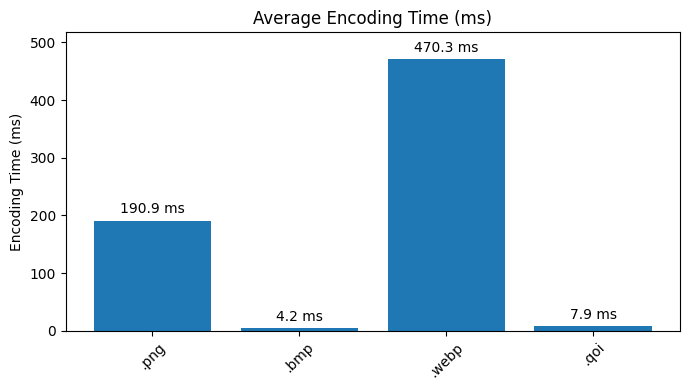

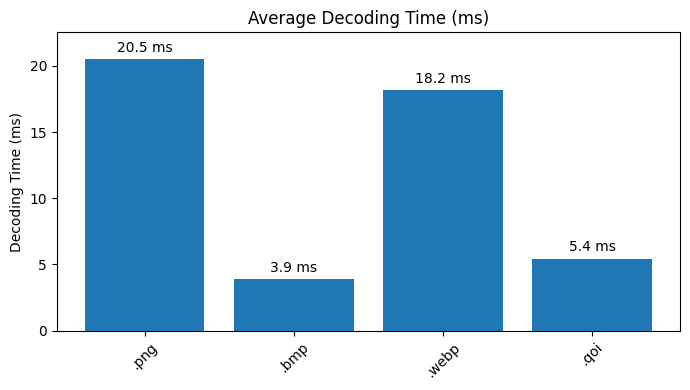

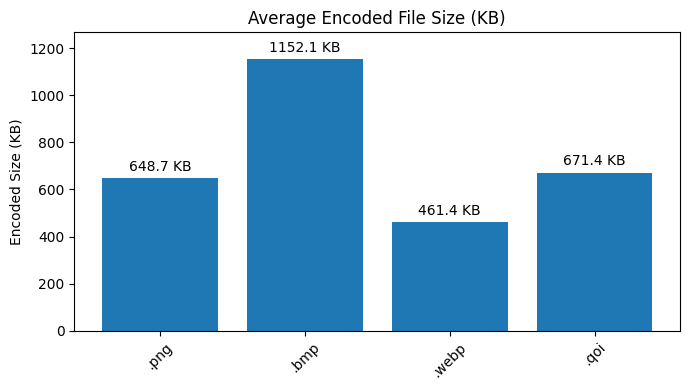

In [43]:
import matplotlib.pyplot as plt

# Initialize accumulators for each extension type
extension_data = {
    '.png': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0},
    '.bmp': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0},
    '.webp': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0},
    '.qoi': {'encoding_time': 0, 'decoding_time': 0, 'encoded_size': 0, 'count': 0}
}

# Process all images and all extensions
for result in test_results:
    print(f"File: {result[0]}")
    for i in range(1, len(result)):
        extension = result[i][0]
        encoding_time = result[i][1]
        decoding_time = result[i][2]
        encoded_size = result[i][3]

        # Update the totals for the current extension
        if extension in extension_data:
            extension_data[extension]['encoding_time'] += encoding_time
            extension_data[extension]['decoding_time'] += decoding_time
            extension_data[extension]['encoded_size'] += encoded_size
            extension_data[extension]['count'] += 1

# Prepare the data for plotting
extensions = []
avg_encoding_times = []
avg_decoding_times = []
avg_encoded_sizes = []

for ext, data in extension_data.items():
    if data['count'] > 0:
        avg_encoding_time = data['encoding_time'] / data['count']
        avg_decoding_time = data['decoding_time'] / data['count']
        avg_encoded_size = data['encoded_size'] / data['count']

        extensions.append(ext)
        avg_encoding_times.append(avg_encoding_time * 1000)  # Convert to milliseconds
        avg_decoding_times.append(avg_decoding_time * 1000)  # Convert to milliseconds
        avg_encoded_sizes.append(1 * avg_encoded_size / 1024)

# Plotting the bar charts
def plot_barchart(data, title, ylabel, unit, tag, labels, values):
    fig, ax = plt.subplots(figsize=(7, 4))
    bars = ax.bar(labels, values)

    ax.set_title(title)
    ax.set_ylabel(ylabel)

    # Annotate values on top of the bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.1f} {unit}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    max_height = max(values)
    ax.set_ylim(0, max_height * 1.1)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{home_directory}/fig_average_{tag}.png")
    plt.show()

# Plot the three separate bar charts
plot_barchart(avg_encoding_times, 'Average Encoding Time (ms)', 'Encoding Time (ms)', 'ms', 'encoding', extensions, avg_encoding_times)
plot_barchart(avg_decoding_times, 'Average Decoding Time (ms)', 'Decoding Time (ms)', 'ms', 'decoding', extensions, avg_decoding_times)
plot_barchart(avg_encoded_sizes, 'Average Encoded File Size (KB)', 'Encoded Size (KB)', 'KB', 'file_size', extensions, avg_encoded_sizes)


# ?. Lossy Extensions

# 4. Data Visualization

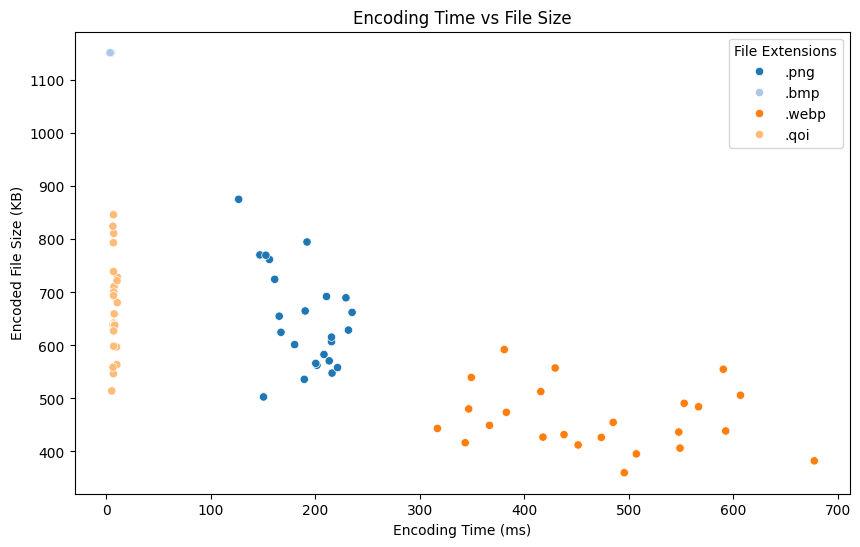

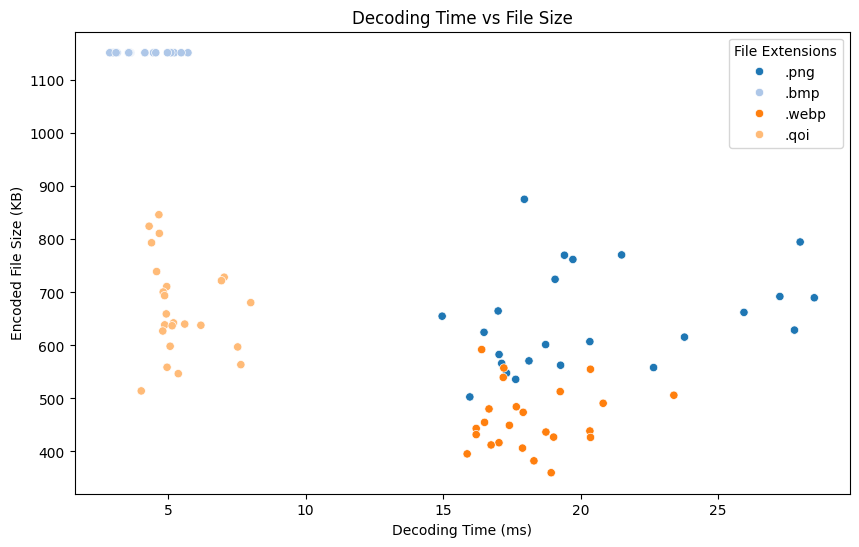

<ipython-input-44-952d43671a70>:43: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='extension', y='encoding_time_ms', ci=None)


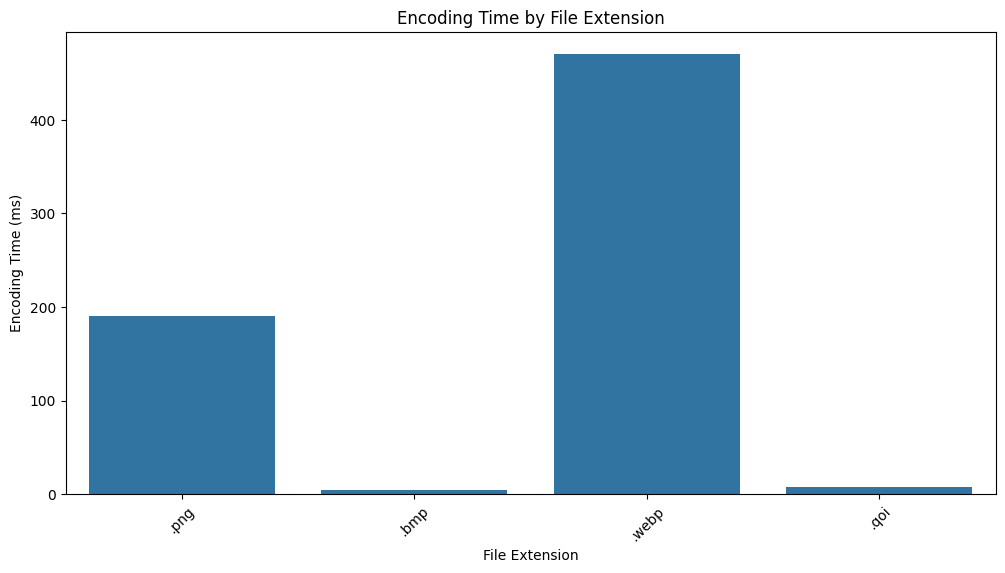

<ipython-input-44-952d43671a70>:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='extension', y='encoded_size_kb', ci=None)


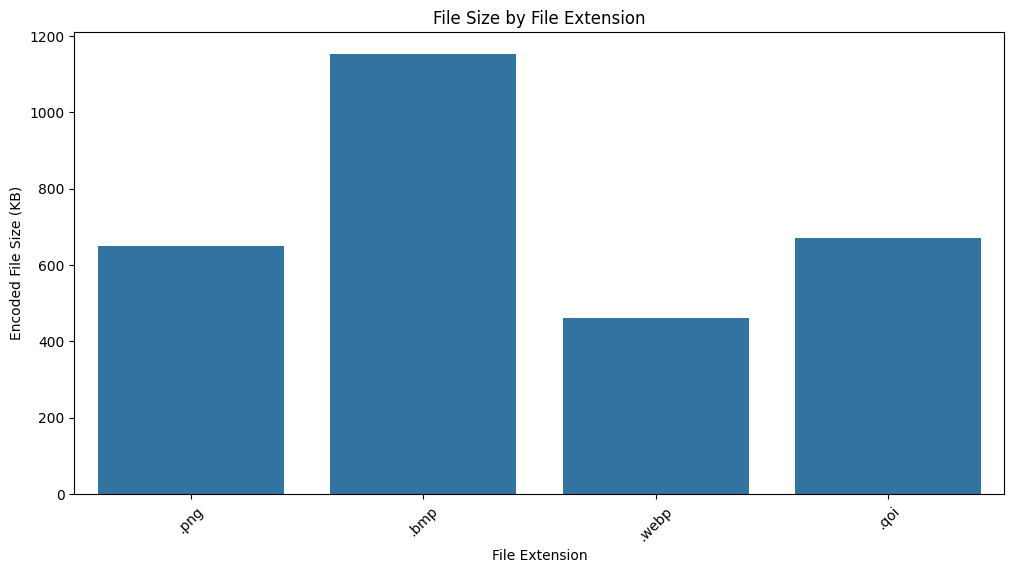

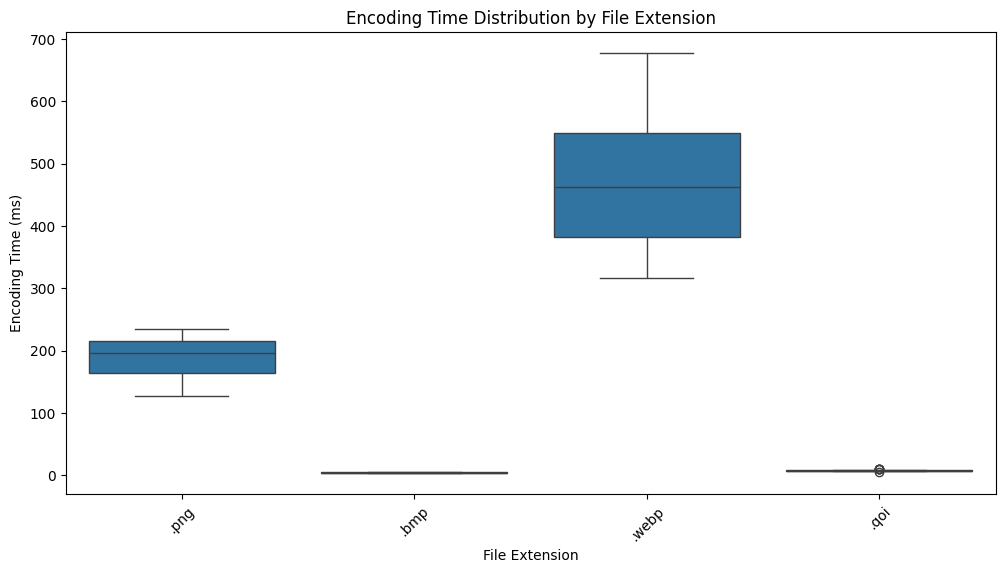

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Flatten the data into a DataFrame
data = []
for result in test_results:
    image_file_path = result[0]
    for i in range(1, len(result)):
        ext, encoding_time, decoding_time, encoded_size = result[i]
        data.append({
            'image_path': image_file_path,
            'extension': ext,
            'encoding_time_ms': encoding_time * 1000,  # Convert seconds to milliseconds
            'decoding_time_ms': decoding_time * 1000,  # Convert seconds to milliseconds
            'encoded_size_kb': encoded_size / 1024,    # Convert bytes to kilobytes
        })

df = pd.DataFrame(data)

# Step 2: Plotting Encoding Time vs File Size (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='encoding_time_ms', y='encoded_size_kb', hue='extension', palette='tab20')
plt.title('Encoding Time vs File Size')
plt.xlabel('Encoding Time (ms)')
plt.ylabel('Encoded File Size (KB)')
plt.legend(title='File Extensions')
plt.savefig(f"{home_directory}/enc_vs_file_size_scatter_plot.png")
plt.show()

# Step 3: Plotting Decoding Time vs File Size (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='decoding_time_ms', y='encoded_size_kb', hue='extension', palette='tab20')
plt.title('Decoding Time vs File Size')
plt.xlabel('Decoding Time (ms)')
plt.ylabel('Encoded File Size (KB)')
plt.legend(title='File Extensions')
plt.savefig(f"{home_directory}/dec_vs_file_size_scatter_plot.png")
plt.show()

# Step 4: Plotting Encoding Time by File Extension (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='extension', y='encoding_time_ms', ci=None)
plt.title('Encoding Time by File Extension')
plt.xlabel('File Extension')
plt.ylabel('Encoding Time (ms)')
plt.xticks(rotation=45)
plt.show()

# Step 5: Plotting File Size by Extension (Bar Chart)
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='extension', y='encoded_size_kb', ci=None)
plt.title('File Size by File Extension')
plt.xlabel('File Extension')
plt.ylabel('Encoded File Size (KB)')
plt.xticks(rotation=45)
plt.show()

# Step 6: Box Plot for Encoding Time by File Extension
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='extension', y='encoding_time_ms')
plt.title('Encoding Time Distribution by File Extension')
plt.xlabel('File Extension')
plt.ylabel('Encoding Time (ms)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
first_test_result = test_results[0]
f_file_path = first_test_result[0]
print(f_file_path)

extension_results = first_test_result[1:]
extension_results

/content/drive/MyDrive/ICF/datasets/kodak/kodim01.png


[['.png', 0.3903634548187256, 0.05777382850646973, 780430],
 ['.bmp', 0.005007266998291016, 0.01197195053100586, 1179702],
 ['.webp', 0.9735515117645264, 0.048055171966552734, 502628],
 ['.qoi', 0.011780977249145508, 0.007008075714111328, 746144]]

# ?. JPEG XL lossless